In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px

# Importing the dataset and first review

In [2]:
#lets import the dataset and review the first five rows
df = pd.read_csv('../input/sp-500-companies-with-financial-information/financials.csv')
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
#lets see the column names
df.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [4]:
#lets see how many rows and columns the dataset has
df.shape

(505, 14)

In [5]:
#Lets get some idea what inside the dataset

df.describe(include='all')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
count,505,505,505,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000,505
unique,505,505,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505
top,IQV,Grainger (W.W.) Inc.,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
freq,1,1,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179,NaN
std,NaN,NaN,NaN,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508,NaN
min,NaN,NaN,NaN,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000,NaN
25%,NaN,NaN,NaN,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000,NaN
50%,NaN,NaN,NaN,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000,NaN
75%,NaN,NaN,NaN,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000,NaN


In [6]:
#lets check if all data is available or we have something NaN
print(df.isnull().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


In [7]:
#lets see these two rows where the Price/Earnings data is missing

df[df['Price/Earnings'].isnull()]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
360,PRGO,Perrigo,Health Care,84.44,NaN,0.731261,-28.01,95.93,63.68,1.232638e+10,0.0,3.385007,2.03,http://www.sec.gov/cgi-bin/browse-edgar?action...
430,TPR,"Tapestry, Inc.",Consumer Discretionary,48.85,NaN,0.000000,2.09,50.71,36.69,1.424720e+10,0.0,4.078549,4.35,http://www.sec.gov/cgi-bin/browse-edgar?action...


# Analysis

In [8]:
#how much each Sector has in Market Cap, rounded to 1 decimal point
dfsec = df.groupby(["Sector"]).sum().sort_values("Market Cap", ascending=False).head(20) 
dfsec = dfsec[["Market Cap"]].round(1) 
dfsec.reset_index(inplace=True) 
dfsec

,Sector,Market Cap
0,Information Technology,6.727122e+12
1,Financials,3.442649e+12
2,Health Care,3.244359e+12
3,Consumer Discretionary,3.213563e+12
4,Industrials,2.411541e+12
5,Consumer Staples,2.087076e+12
6,Energy,1.357314e+12
7,Materials,6.923003e+11
8,Real Estate,6.253157e+11
9,Utilities,6.116326e+11


(array([0.e+00, 1.e+12, 2.e+12, 3.e+12, 4.e+12, 5.e+12, 6.e+12, 7.e+12,
        8.e+12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

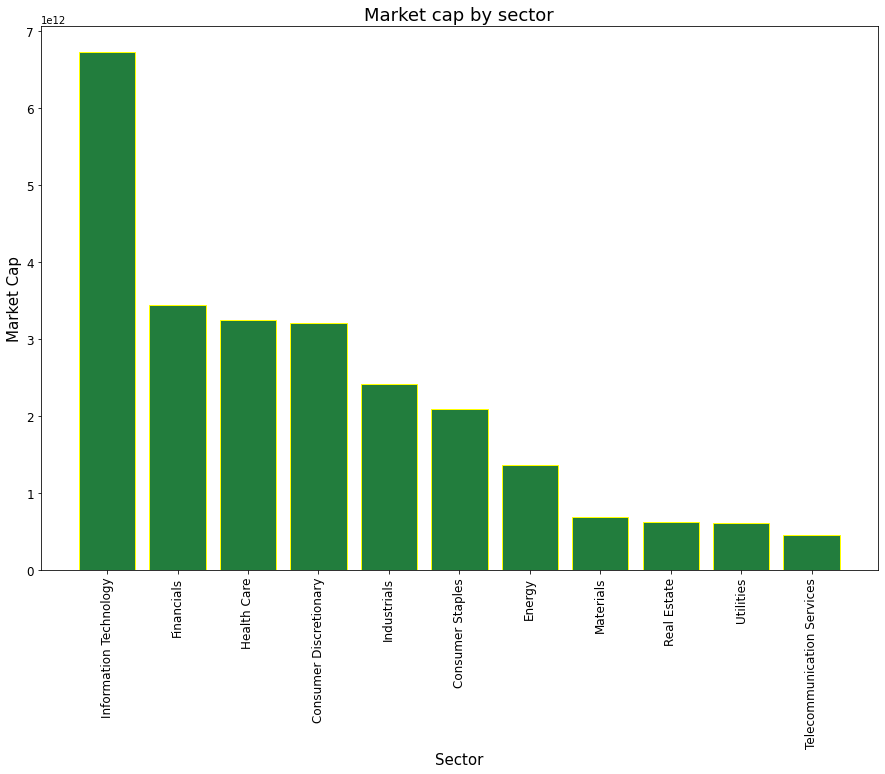

In [9]:
#plotting the Market Cap by Sector

plt.figure(figsize = (15,10)) # width and height of figure is defined in inches
plt.title("Market cap by sector", fontsize=18) 
plt.bar(dfsec["Sector"], dfsec["Market Cap"],color= '#227d3d',edgecolor='yellow', linewidth = 1)
plt.xlabel("Sector",fontsize=15) # x axis shows the States
plt.ylabel("Market Cap",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)


We see that IT sector is the leader, followed by Financials and Health Care sector. Let's have a closer look on these three sectors.

In [10]:
#lets review EBITDA by Sector, on the second line we are rounding to 1 decimal point

dfebitda = df.groupby(["Sector"]).sum().sort_values("EBITDA", ascending=False).head() 
dfebitda = dfebitda[["EBITDA"]].round(1) 
dfebitda.reset_index(inplace=True) 
dfebitda

,Sector,EBITDA
0,Information Technology,4.313397e+11
1,Consumer Discretionary,2.941510e+11
2,Health Care,2.231056e+11
3,Industrials,2.052230e+11
4,Consumer Staples,1.799275e+11


In [11]:
fig = px.pie(dfebitda, values='EBITDA', title='EBITDA by Sector (hover to see details)', hole=.3, hover_data=['Sector'], labels={'Sector'})
fig.show()

IT sector is leading by both Market Cap and EBITDA, Health Care is also in the same third place, while second place is now taken by Consumer Discretionary

# Splitting Sectors

Lets have a closer look at the dataset by sectors

In [12]:
#lets create three top sectors
dfit=df[df['Sector']=='Information Technology']
dffin=df[df['Sector']=='Financials']
dfhc=df[df['Sector']=='Health Care']

In [13]:
dfit.head(3)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,5.251867e+10,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,9.455021e+10,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [14]:
dffin.head(3)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
12,AMG,Affiliated Managers Group Inc,Financials,179.11,12.24,0.638740,12.07,216.995,148.81,1.044217e+10,1.261400e+09,4.591235,2.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
13,AFL,AFLAC Inc,Financials,83.25,12.24,2.429907,11.01,91.730,68.80,3.342295e+10,0.000000e+00,1.542934,1.53,http://www.sec.gov/cgi-bin/browse-edgar?action...
26,ALL,Allstate Corp,Financials,90.06,13.26,1.527821,4.68,105.360,77.73,3.475947e+10,0.000000e+00,1.208556,1.67,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [15]:
dfhc.head(3)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
11,AET,Aetna Inc,Health Care,178.00,18.11,1.101989,5.75,194.40,119.51,5.919702e+10,4.139000e+09,0.992355,3.79,http://www.sec.gov/cgi-bin/browse-edgar?action...


Lets review the 5 top companies by Price in each of the sectors

In [16]:
dfit=dfit.sort_values(by='Price',ascending=False).head(5)
dfit

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.000000,1.25,286.81,138.2600,1.148054e+11,8.090280e+08,9.861594,30.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
24,ADS,Alliance Data Systems,Information Technology,240.60,13.02,0.924012,14.13,278.33,209.0000,1.363261e+10,2.143200e+09,1.728230,8.28,http://www.sec.gov/cgi-bin/browse-edgar?action...
81,AVGO,Broadcom,Information Technology,229.57,15.94,2.948858,4.01,285.68,202.6100,9.279197e+10,7.016000e+09,6.961893,4.40,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [17]:
dffin=dffin.sort_values(by='Price',ascending=False).head(5)
dffin

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
73,BLK,BlackRock,Financials,509.38,22.49,2.164356,30.30,594.520,368.00,8.590776e+10,5.684000e+09,6.915820,2.95,http://www.sec.gov/cgi-bin/browse-edgar?action...
216,GS,Goldman Sachs Group,Financials,246.35,12.44,1.166861,8.61,273.790,209.62,9.697850e+10,0.000000e+00,2.309415,1.25,http://www.sec.gov/cgi-bin/browse-edgar?action...
178,RE,Everest Re Group Ltd.,Financials,241.06,27.24,2.107823,23.71,277.170,208.81,1.013189e+10,0.000000e+00,2.099199,1.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
70,BRK.B,Berkshire Hathaway,Financials,191.42,30.43,0.000000,9.76,217.620,160.93,2.614012e+11,0.000000e+00,1.432823,1.58,http://www.sec.gov/cgi-bin/browse-edgar?action...
12,AMG,Affiliated Managers Group Inc,Financials,179.11,12.24,0.638740,12.07,216.995,148.81,1.044217e+10,1.261400e+09,4.591235,2.89,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [18]:
dfhc=dfhc.sort_values(by='Price',ascending=False).head(5)
dfhc

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
306,MTD,Mettler Toledo,Health Care,601.00,35.56,0.000000,14.24,697.2600,459.34000,1.642077e+10,6.667060e+08,8.372307,31.69,http://www.sec.gov/cgi-bin/browse-edgar?action...
254,ISRG,Intuitive Surgical Inc.,Health Care,381.87,48.58,0.000000,5.67,452.0000,233.10643,4.486662e+10,1.153700e+09,14.655261,9.48,http://www.sec.gov/cgi-bin/browse-edgar?action...
392,REGN,Regeneron,Health Care,322.62,27.93,0.000000,7.74,543.5518,319.50000,3.595037e+10,2.043160e+09,8.485410,5.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
72,BIIB,Biogen Inc.,Health Care,311.79,14.30,0.000000,11.94,370.5700,244.28000,6.915773e+10,6.511400e+09,5.737439,5.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
238,HUM,Humana Inc.,Health Care,262.37,22.39,0.604001,4.06,293.3500,189.01000,3.697362e+10,0.000000e+00,0.925690,3.33,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [19]:
#we can also use "largest" function, lets try on health care sector

dfhc1 = dfhc.nlargest(5, ['Price'])

In [20]:
#this is how to add a title to the dataframe
dfhc2 = dfhc1[['Sector','Name','Price']]
dfhc2.style.set_table_attributes("style='display:inline'").set_caption('Top five companies by Price in the Health Care Sector')

,Sector,Name,Price
306,Health Care,Mettler Toledo,601.000000
254,Health Care,Intuitive Surgical Inc.,381.870000
392,Health Care,Regeneron,322.620000
72,Health Care,Biogen Inc.,311.790000
238,Health Care,Humana Inc.,262.370000


In [21]:
#this is how to add a title to the dataframe
dfit = dfit[['Name','Price']]
dfit.style.set_table_attributes("style='display:inline'").set_caption('Top five companies by Price in the IT Sector')

,Name,Price
27,Alphabet Inc Class A,1007.710000
28,Alphabet Inc Class C,1001.520000
326,Netflix Inc.,250.100000
24,Alliance Data Systems,240.600000
81,Broadcom,229.570000


In [22]:
#this is how to add a title to the dataframe
dffin = dffin[['Name','Price']]
dffin.style.set_table_attributes("style='display:inline'").set_caption('Top five companies by Price in the Financials Sector')

,Name,Price
73,BlackRock,509.380000
216,Goldman Sachs Group,246.350000
178,Everest Re Group Ltd.,241.060000
70,Berkshire Hathaway,191.420000
12,Affiliated Managers Group Inc,179.110000


# Plots

<AxesSubplot:xlabel='Price', ylabel='Count'>

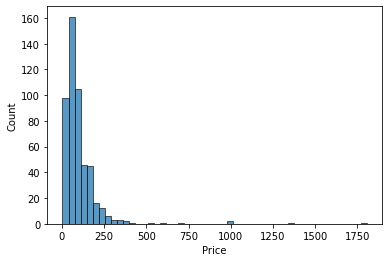

In [32]:
sns.histplot(data=df['Price'],bins=50, kde=False)

<AxesSubplot:ylabel='Price'>

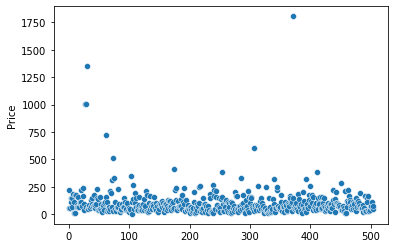

In [24]:
sns.scatterplot(data=df['Price'])

<AxesSubplot:xlabel='Earnings/Share', ylabel='Count'>

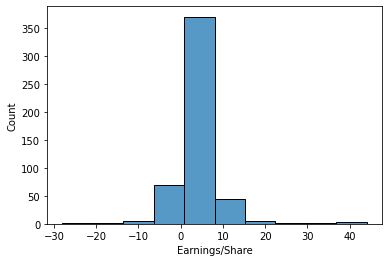

In [27]:
sns.histplot(data=df['Earnings/Share'],bins=10,kde=False)